# Aliev Panfilov ionic model
The Aliev Panfilov (AP) ionic model simulates the restitution property of cardiac tissue.

It consists of two equations:

$$
\begin{equation}
\begin{cases}
\dfrac{\partial u}{\partial t} &= -ku(u-a)(u-1)-uv \\
\dfrac{\partial v}{\partial t} &= \epsilon(u,v)\left[ -v -ku(u-a-1)\right]
\end{cases},
\end{equation}
$$

where $\epsilon(u,v)=\epsilon_0+\tfrac{\mu_1 v}{u+\mu_2}$, with $k=8$, $a=0.15$, $\epsilon_0=0.002$, $\mu_1=0.2$ and $\mu_2=0.3$.

The model involves dimensionless variables $u$, $v$ and $t$. The actual action potential $E$, in mV, and the time $T$, in ms, can be obtained with the formulae:
$$E[mV]=100u-80, \qquad T[ms]=12.9t .$$

The model in compact form reads

$$\dfrac{\partial \mathbf{w}}{\partial t} = F(u,v),$$

where $\mathbf{w}=[u,v]$ and $F(u,v)=\left[-ku(u-a)(u-1)-uv,\epsilon(u,v)\left[ -v -ku(u-a-1)\right]\right]$.
   
Reference: https://doi.org/10.1016/0960-0779(95)00089-5.


### ODEINT 
To numerically solve the AP model in Python we use the `scipy.integrate` package using function `odeint`.

```python
y = odeint(model, y0, t)
```

The `odeint` requires three inputs: 

- ___model___: function name that returns derivative values at requested y and t values as `dydt = model(y,t)`;
- ___y0___: initial conditions of the differential states;
- ___t___: time points at which the solution should be reported.

An example of using `odeint` is the following differential equation 

$$\dfrac{d y(t)}{d t} = -ky(t),$$

with parameter $k=0.3$, the initial condition $y0=5$.

The Python code first imports the needed Numpy, Scipy, and Matplotlib packages. The model, initial conditions, and time points are defined as inputs to `odeint` to numerically calculate y(t). 

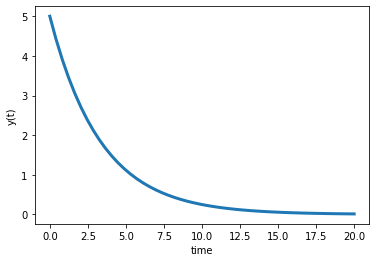

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,linewidth=3)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### AP model resolution in Python

In [3]:
import numpy as np  
import matplotlib.pyplot as plot  
from scipy.integrate import odeint 

def AP_model(k=8, a=0.15, eps_0=0.002, mu_1=0.2, mu_2=0.3):
    def eps_fun(u, v):
        return eps_0 + mu_1*v/(u+mu_2)

    def fun(y, t):
        u, v = y
        eps = eps_fun(u,v)
        dydt = [-k*u*(u-a)*(u-1)-u*v, eps*(-v-k*u*(u-a-1))]
        return dydt
    return fun

def u_to_mV(u):
    return 100 * u - 80

def t_to_ms(t):
    return 12.9 * t

def pictures(t, solution):
    fig = plot.figure(1, figsize=(10, 12))

    ax1 = fig.add_subplot(221)
    ax1.plot(t, solution[:, 0],'k',linewidth=2)
    ax1.set_title('Adimensional action potential u')
    ax1.set_xlabel('t [-]')
    ax1.set_ylabel('u [-]')

    ax2 = fig.add_subplot(222)
    ax2.plot(t, solution[:, 1],'b',linewidth=2)
    ax2.set_title('Adimensional gating variale v')
    ax2.set_xlabel('t [-]')
    ax2.set_ylabel('v [-]')

    ax3 = fig.add_subplot(223)
    ax3.plot(solution[:, 0], solution[:, 1],'r',linewidth=2)
    ax3.set_title('Phase diagram')
    ax3.set_xlabel('u [-]')
    ax3.set_ylabel('v [-]')

    E = u_to_mV(solution[:, 0])
    T = t_to_ms(t)

    ax4 = fig.add_subplot(224)
    ax4.set_title('Dimensional action potential E')
    ax4.plot(T, E,'g',linewidth=2)
    ax4.set_xlabel('T [ms]')
    ax4.set_ylabel('E [mV]')

    plot.show()


def run():
    t_0 = 0
    t_end = 40
    discretization = (t_end - t_0) * 1000
    t = np.linspace(t_0, t_end, discretization)

    y0 = (0.17, 0)

    solution = odeint(AP_model(), y0, t)

    pictures(t, solution)

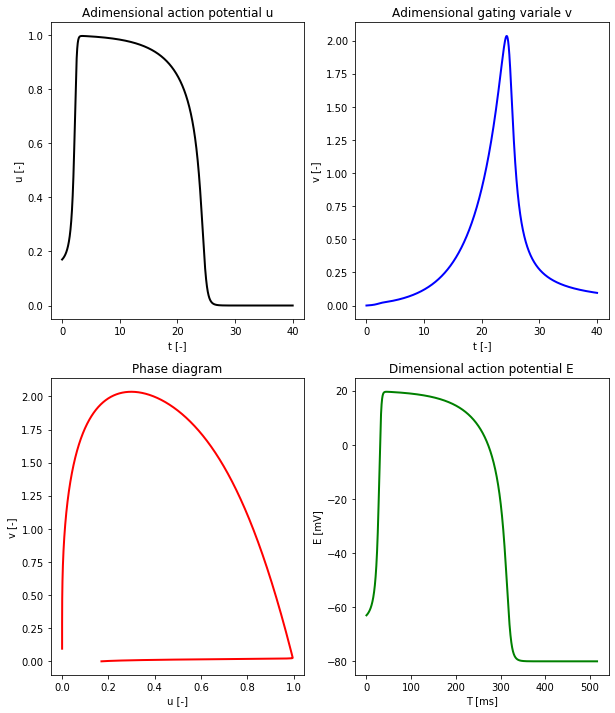

In [4]:
run()

# Monodomain equation

The monodomain model solved is:
$$
\left\{
\begin{alignedat}{3}
\frac{\partial u}{\partial t} - \nabla\cdot\left( \mathbf{\sigma}_m \nabla u\right) + 
I_\mathrm{ion}(u, \mathbf{v}) & = I_\mathrm{app}(\mathbf{x},t), & \quad & \text{in }
\Omega,\\
\dfrac{\partial \mathbf{v}}{\partial t} &= F(u,\mathbf{v}), & \quad & \text{in }
\Omega,\\
\mathbf{\sigma}_m \nabla u\cdot\mathbf{\nu} & = 0, & \quad &
\text{on } \partial\Omega, 
\end{alignedat} 
\right.
$$

The ionic current $I_\mathrm{ion}$ is provided by a Ionic model, $\Omega$ is the computational domain and $ \mathbf{\sigma}_m$ is defined as

$$
\mathbf{\sigma}_m = \sigma_{m}^l\mathbf{f} \otimes \mathbf{f}
                   +\sigma_{m}^t\mathbf{s} \otimes \mathbf{s}
                   +\sigma_{m}^n\mathbf{n} \otimes \mathbf{n},
$$

where $\sigma_{m}^t$, $\sigma_{m}^l$, and $\sigma_{m}^n$ are the conductivity coefficients along the cardiac muscle fibers directions.

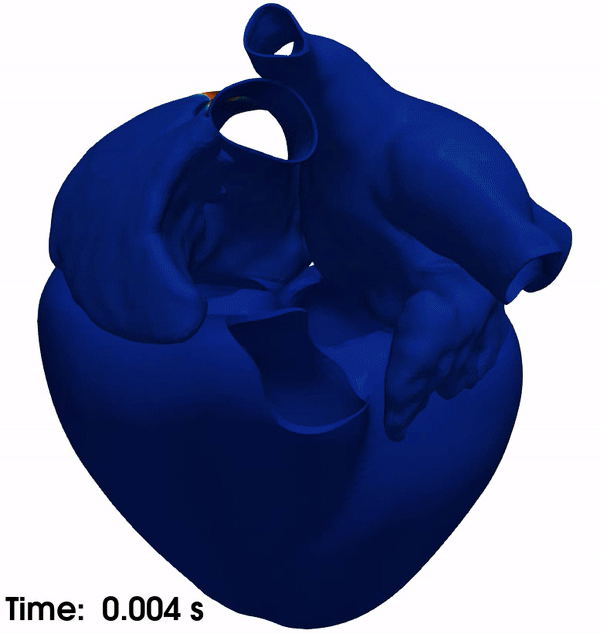

In [6]:
from IPython.display import Image
Image(filename='Heart_AP_90.gif')